In [ ]:
##########

## Project: Using Autoencoders to Reproduce and Denoise Images

##########

# Part 1- Autoencoders to Reproduce Images

In [ ]:
# import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# import MNIST dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# take a look at a sample image in train set

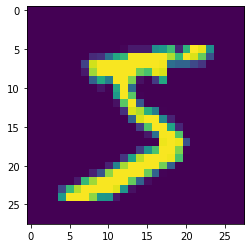

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0].max()

255

In [ ]:
X_train[0].min()

0

In [ ]:
# Comment: we need to rescale our images, in this case by dividing our numpy arrays by 255

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Now let's build our autoencoder model

In [ ]:
# import packages

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
# how much dimensionality reduction is enough(yet not excessive)?
(783/2)

391.5

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [ ]:
# and now for the autoencoder

In [ ]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 293us/sample - loss: 0.2496 - accuracy: 0.7914 - val_loss: 0.2133 - val_accuracy: 0.7952
Epoch 2/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.1872 - accuracy: 0.7977 - val_loss: 0.1687 - val_accuracy: 0.8013
Epoch 3/5
60000/60000 [==============================] - 16s 274us/sample - loss: 0.1620 - accuracy: 0.8019 - val_loss: 0.1555 - val_accuracy: 0.8021
Epoch 4/5
60000/60000 [==============================] - 17s 277us/sample - loss: 0.1517 - accuracy: 0.8033 - val_loss: 0.1605 - val_accuracy: 0.7970
Epoch 5/5
60000/60000 [==============================] - 18s 305us/sample - loss: 0.1442 - accuracy: 0.8046 - val_loss: 0.1385 - val_accuracy: 0.8053


In [ ]:
# now reproduce some test images

In [ ]:
passed_images = autoencoder.predict(X_test[:10])

1/1 [==============================] - 0s 182ms/step


In [ ]:
# let's see some reproduced test images and compare with original from test set

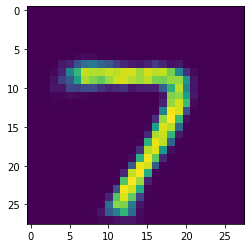

In [ ]:
plt.imshow(passed_images[0])

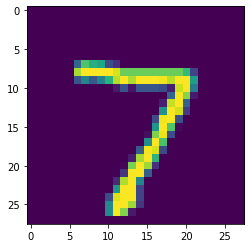

In [ ]:
plt.imshow(X_test[0])

In [ ]:
# not bad!
# let's see another reproduced image

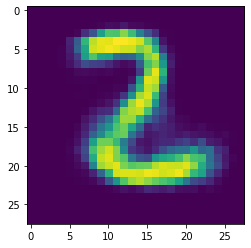

In [ ]:
plt.imshow(passed_images[1])

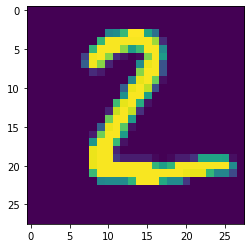

In [ ]:
plt.imshow(X_test[1])

In [ ]:
# and now to Part 2..

# Part 2- Denoising Images with Autoencoders

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
# let's create a noisy version of some images

In [ ]:
sample = GaussianNoise(0.2)

In [ ]:
noisey = sample(X_test[0:2],training=True)

In [ ]:
# now let's visualize the original versus the noisier image counterpart

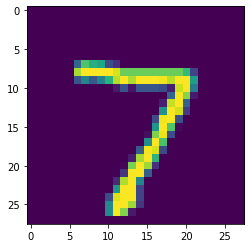

In [ ]:
plt.imshow(X_test[0])

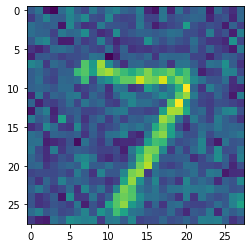

In [ ]:
plt.imshow(noisey[0])

In [ ]:
# Following, let's create a noise removal autoencoder that includes a step in which noise is introduced to images

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [ ]:
noise_remover = Sequential([encoder, decoder])

In [ ]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [ ]:
#now let's fit the model on our train set

In [ ]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 12s 202us/sample - loss: 0.1079 - accuracy: 0.8117 - val_loss: 0.1030 - val_accuracy: 0.8112
Epoch 2/8
60000/60000 [==============================] - 17s 284us/sample - loss: 0.1061 - accuracy: 0.8119 - val_loss: 0.1028 - val_accuracy: 0.8114
Epoch 3/8
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1046 - accuracy: 0.8121 - val_loss: 0.1004 - val_accuracy: 0.8118
Epoch 4/8
60000/60000 [==============================] - 18s 301us/sample - loss: 0.1035 - accuracy: 0.8123 - val_loss: 0.0990 - val_accuracy: 0.8120
Epoch 5/8
60000/60000 [==============================] - 18s 298us/sample - loss: 0.1025 - accuracy: 0.8124 - val_loss: 0.0989 - val_accuracy: 0.8120
Epoch 6/8
60000/60000 [==============================] - 18s 296us/sample - loss: 0.1016 - accuracy: 0.8126 - val_loss: 0.0979 - val_accuracy: 0.8120
Epoch 7/8
60000/60000 [===========================

In [ ]:
# now let's take 10 images from test set, add random noise to them, and then apply our noise remover model on them

In [ ]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

In [ ]:
# let's visualize some results

The Original


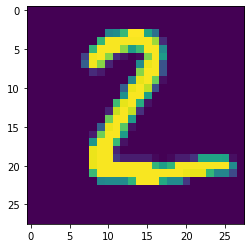

The Noisey Version


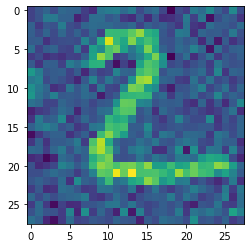

After going through denoiser


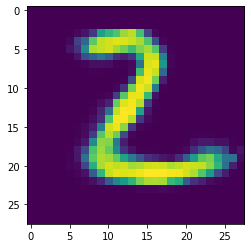

In [ ]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

In [ ]:
# not bad indeed!